## Plot the locations of all profiles

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import json
import numpy as np
import xarray as xr
import os

import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from datetime import date
import io
import json


In [12]:
def get_netcdf_profiles(netcdf_name):

    dsprof=xr.open_dataset(netcdf_name)
    depth=dsprof['depth_en4']
    temp_en4=dsprof['temp_profileEN4']
    mean_temp_model=dsprof['mean_temp_model']

    return depth,temp_en4,mean_temp_model

In [13]:
def map_profiles_from_jsonfile(all_lat,all_lon,reg):
    
    if reg == 'EU':
        fig, ax = plt.subplots(1,1,figsize=(10,15))
        latmin,latmax,lonmin,lonmax=(32.6,65.6,-18.5,10)
        maskfile='/store/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'

    if reg == 'GS':
        fig, ax = plt.subplots(1,1,figsize=(15,10))
        latmin,latmax,lonmin,lonmax=(27,48,-81,-40)
        maskfile='/scratch/cnt0024/hmg2840/albert7a/GS36.L75/GS36.L75-I/GS36.L75-MAA007_mesh_mask.nc'


    mask=xr.open_dataset(maskfile)
    tmask=mask.tmask[0,0]
    navlat= mask['nav_lat']
    navlon= mask['nav_lon']
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonmin, lonmax, latmin, latmax))
    ax.contour(navlon,navlat,tmask,alpha=0.5,linewidth=0.000001,antialiased=True,colors='black')
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.scatter(all_lon, all_lat, c='g', linewidth='0', s=18);
    plt.title('EN4 profiles in '+reg+' region in 2012-2013 dep>100m', size=20);
    plt.savefig('profiles_'+reg+'_period_NATL60_over100m.png')


In [14]:
def concat_lat_lon_dep100m(reg):

    if reg == 'EU':
        config='EU36'
    if reg == 'GS':
        config='GS36'
        
    case='MPC001'
    namezone='NATL60-CJM165_'+reg+'_y2012-2013'
    jsonfile='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/NATL60-CJM165_'+reg+'_y2012-2013_final.json'
    dirn='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_'+reg+'_y2012-2013/'+config+'-'+case+'/'    

    sourcefile=open(jsonfile,'rU',encoding='utf-8')
    infos=json.load(sourcefile)
    nb_profilesEN4=len(infos)
    list_profiles=infos.keys()

    all_lat=np.zeros((nb_profilesEN4))
    all_lon=np.zeros((nb_profilesEN4))
    nb=0
    for prof in np.arange(nb_profilesEN4):
        reference =  str(list(list_profiles)[prof])
        reference_profile=reference[-16:-1]
        outname=dirn+"/profiles_EN4-"+reference_profile+"_"+config+"-"+case+"_TS_vert-stand.nc"
        if os.path.exists(outname):
            depth,temp_en4,mean_temp_model = get_netcdf_profiles(outname)
            ien4=np.where(np.isnan(temp_en4)==True)
            imod=np.where(np.isnan(mean_temp_model)==True)
            if len(imod[:][0])>0:
                   dep_mod=depth[np.min(imod[:][0])].values
            else:
                   dep_mod=0
            if len(ien4[:][0]) >0:
                d=depth[np.min(ien4[:][0])].values
            else:
                d=2000
            if d>100:
                if np.abs(d-dep_mod)<10:
                    nb=nb+1
                    lat_prof = infos[reference]['latitude']
                    lon_prof = infos[reference]['longitude']
                    all_lat[prof]=lat_prof
                    all_lon[prof]=lon_prof
    return all_lat,all_lon,nb
    


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 'U' mode is deprecated
  del sys.path[0]


1096


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


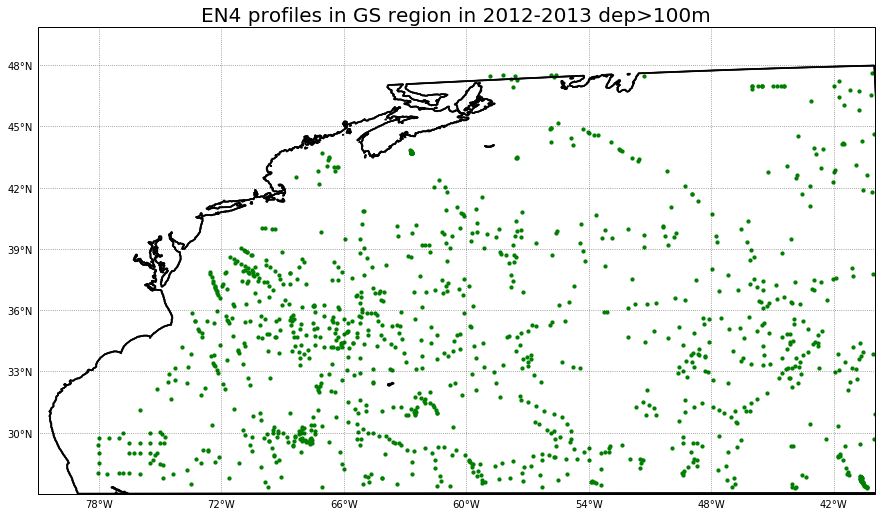

In [15]:
all_lat_GS,all_lon_GS,nb_GS=concat_lat_lon_dep100m('GS')
print(nb_GS)
map_profiles_from_jsonfile(all_lat_GS,all_lon_GS,'GS')

In [16]:
all_lat_EU,all_lon_EU,nb_EU=concat_lat_lon_dep100m('EU')
print(nb_EU)


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 'U' mode is deprecated
  del sys.path[0]


851


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


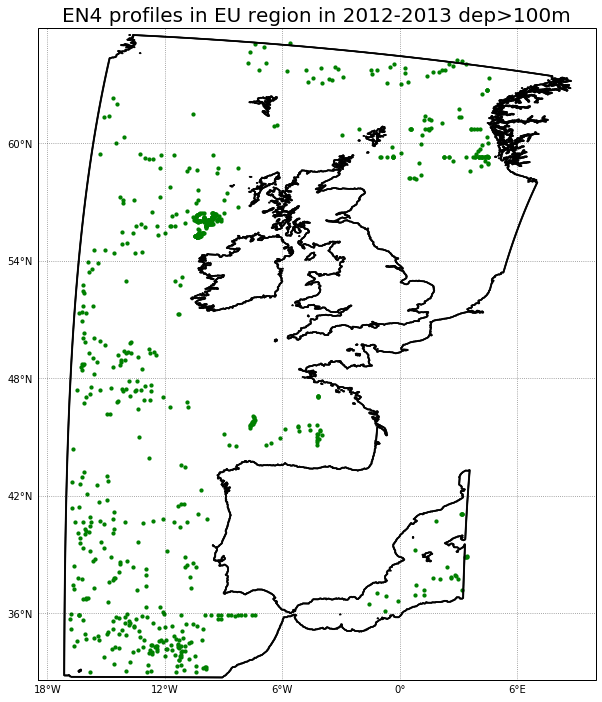

In [17]:
map_profiles_from_jsonfile(all_lat_EU,all_lon_EU,'EU')